In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import find_peaks

# --- Load and preprocess the image ---
image_path = "../LongPathSPLA12.png"  # Replace with your path if needed
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_np = np.array(image)




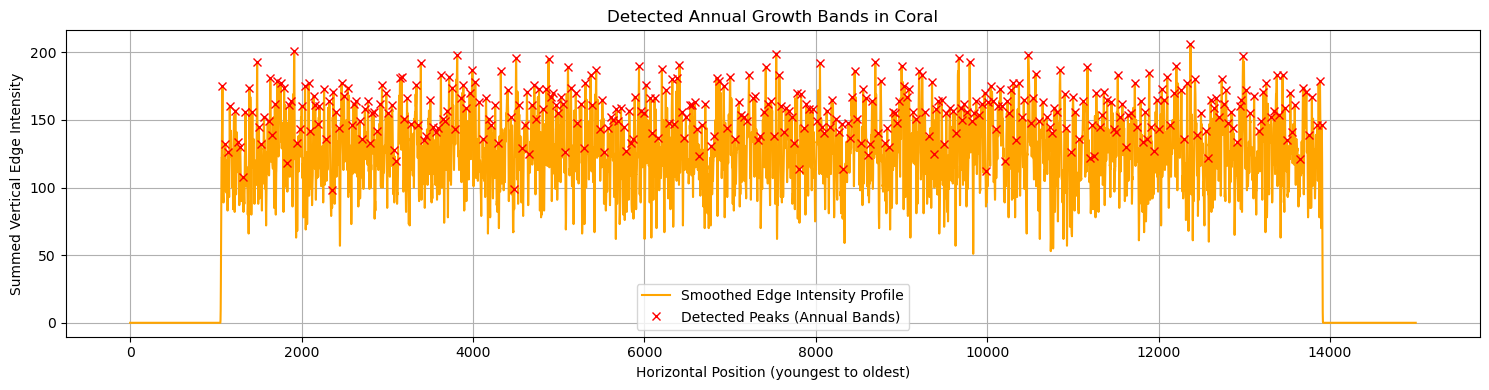

Detected 393 annual bands.
Estimated year range: 1620 to 2012


In [2]:
# Enhance contrast using histogram equalization
equalized_image = cv2.equalizeHist(image_np)

# Apply Sobel filter to highlight vertical edges (growth lines)
sobel_y = cv2.Sobel(equalized_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y_abs = np.uint8(np.absolute(sobel_y))

# --- Collapse the image horizontally to get an edge intensity profile ---
profile = np.sum(sobel_y_abs, axis=0)

# Smooth the profile for better peak detection
profile_2d = profile.reshape(1, -1).astype(np.uint8)
smoothed_profile_2d = cv2.GaussianBlur(profile_2d, (15, 1), 0)
smoothed_profile = smoothed_profile_2d.flatten()

# --- Detect peaks corresponding to annual bands ---
peaks, _ = find_peaks(smoothed_profile, distance=20, prominence=smoothed_profile.max() * 0.05)

# Estimate years based on peak count (assuming 2012 is the outermost/youngest year)
num_years = len(peaks)
year_range = list(range(2012 - num_years + 1, 2013))  # Inclusive of 2012

# --- Plotting the profile and detected peaks ---
plt.figure(figsize=(15, 4))
plt.plot(smoothed_profile, color='orange', label='Smoothed Edge Intensity Profile')
plt.plot(peaks, smoothed_profile[peaks], "rx", label='Detected Peaks (Annual Bands)')
plt.title("Detected Annual Growth Bands in Coral")
plt.xlabel("Horizontal Position (youngest to oldest)")
plt.ylabel("Summed Vertical Edge Intensity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Output summary ---
print(f"Detected {num_years} annual bands.")
print(f"Estimated year range: {year_range[0]} to {year_range[-1]}")

array([242, 242, 242, ..., 242, 242, 242], shape=(15000,), dtype=uint8)

(11000.0, 14000.0)

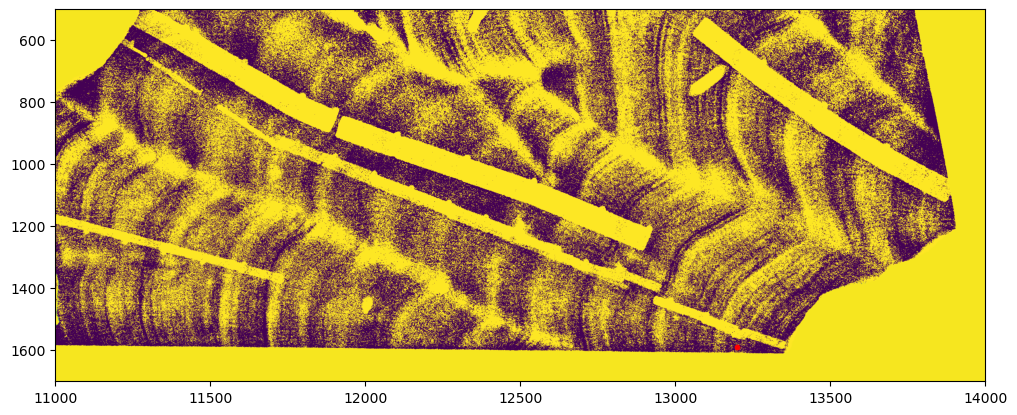

In [4]:
point_x, point_y = 13200, 1590

fig, ax = plt.subplots(1, figsize=(12,5))

ax.imshow(image)
ax.scatter(point_x, point_y, color='red', marker='o', s=10) # Plot point
ax.set_ylim(1700, 500)
ax.set_xlim(11000,14000)